In [1]:
from pathlib import Path
import pydicom
import numpy as np
import cv2 
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm #to get a progress bar

In [2]:
labels = pd.read_csv(r"C:\Users\kisha\OneDrive\Desktop\Projects\MedAI\AI-IN-MEDICAL-MATERIALS\04-Pneumonia-Classification\stage_2_train_labels.csv")

In [3]:
labels.head(6)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1


In [4]:
labels = labels.drop_duplicates("patientId")

In [5]:
labels.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [6]:
ROOT_PATH = Path(r"C:\Users\kisha\OneDrive\Desktop\Projects\MedAI\AI-IN-MEDICAL-MATERIALS\04-Pneumonia-Classification/stage_2_train_images/")
SAVE_PATH = Path(r"C:\Users\kisha\OneDrive\Desktop\Projects\MedAI\AI-IN-MEDICAL-MATERIALS\04-Pneumonia-ClassificationProcessed/")

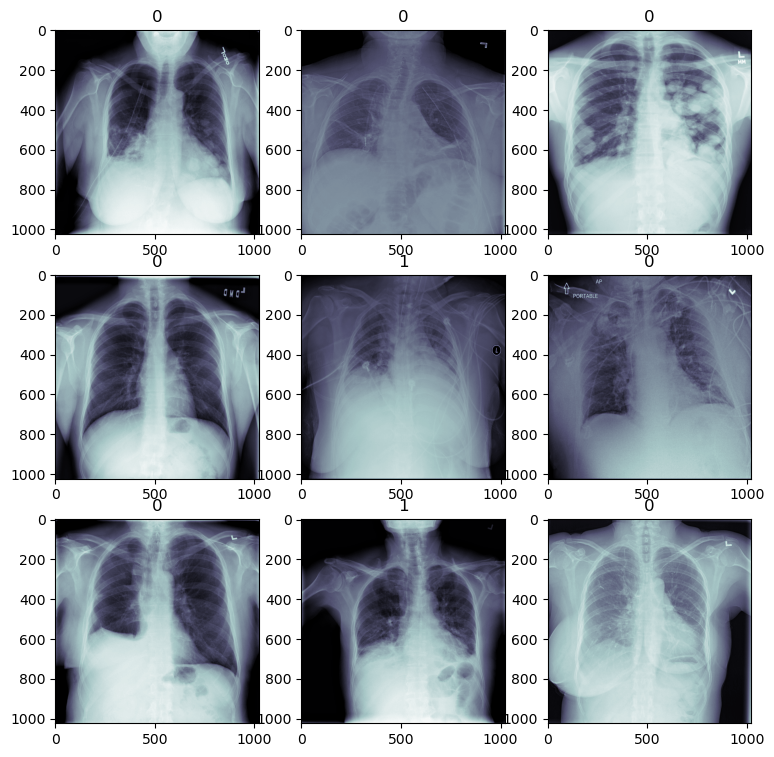

In [13]:
fig, axis = plt.subplots(3, 3, figsize=(9, 9))

c = 0
for i in range(3):
    for j in range(3):
        patient_id = labels.patientId.iloc[c] 
        
        dcm_path = ROOT_PATH/patient_id 
        dcm_path = dcm_path.with_suffix(".dcm")
        dcm = pydicom.read_file(dcm_path).pixel_array
        
        label = labels["Target"].iloc[c]
        
        axis[i][j].imshow(dcm, cmap="bone")
        axis[i][j].set_title(label)
        c+=1

In [9]:
sums = 0
sums_squared = 0

for c, patient_id in enumerate(tqdm(labels.patientId)):
    dcm_path = ROOT_PATH/patient_id 
    dcm_path = dcm_path.with_suffix(".dcm") 
    
    
    dcm = pydicom.read_file(dcm_path).pixel_array / 255  
        
    dcm_array = cv2.resize(dcm, (224, 224)).astype(np.float16)
    
    
    label = labels.Target.iloc[c]
    
    train_or_val = "train" if c < 24000 else "val" 
        
    current_save_path = SAVE_PATH/train_or_val/str(label)
    current_save_path.mkdir(parents=True, exist_ok=True)
    np.save(current_save_path/patient_id, dcm_array)
    
    normalizer = dcm_array.shape[0] * dcm_array.shape[1]
    if train_or_val == "train": 
        sums += np.sum(dcm_array) / normalizer
        sums_squared += (np.power(dcm_array, 2).sum()) / normalizer


  0%|          | 0/26684 [00:00<?, ?it/s]

In [10]:
mean = sums / 24000
std = np.sqrt(sums_squared / 24000 - (mean**2))

In [11]:
print(f"Mean of Dataset: {mean}, STD: {std}")

Mean of Dataset: 0.49039623525191567, STD: 0.2479507326197431
